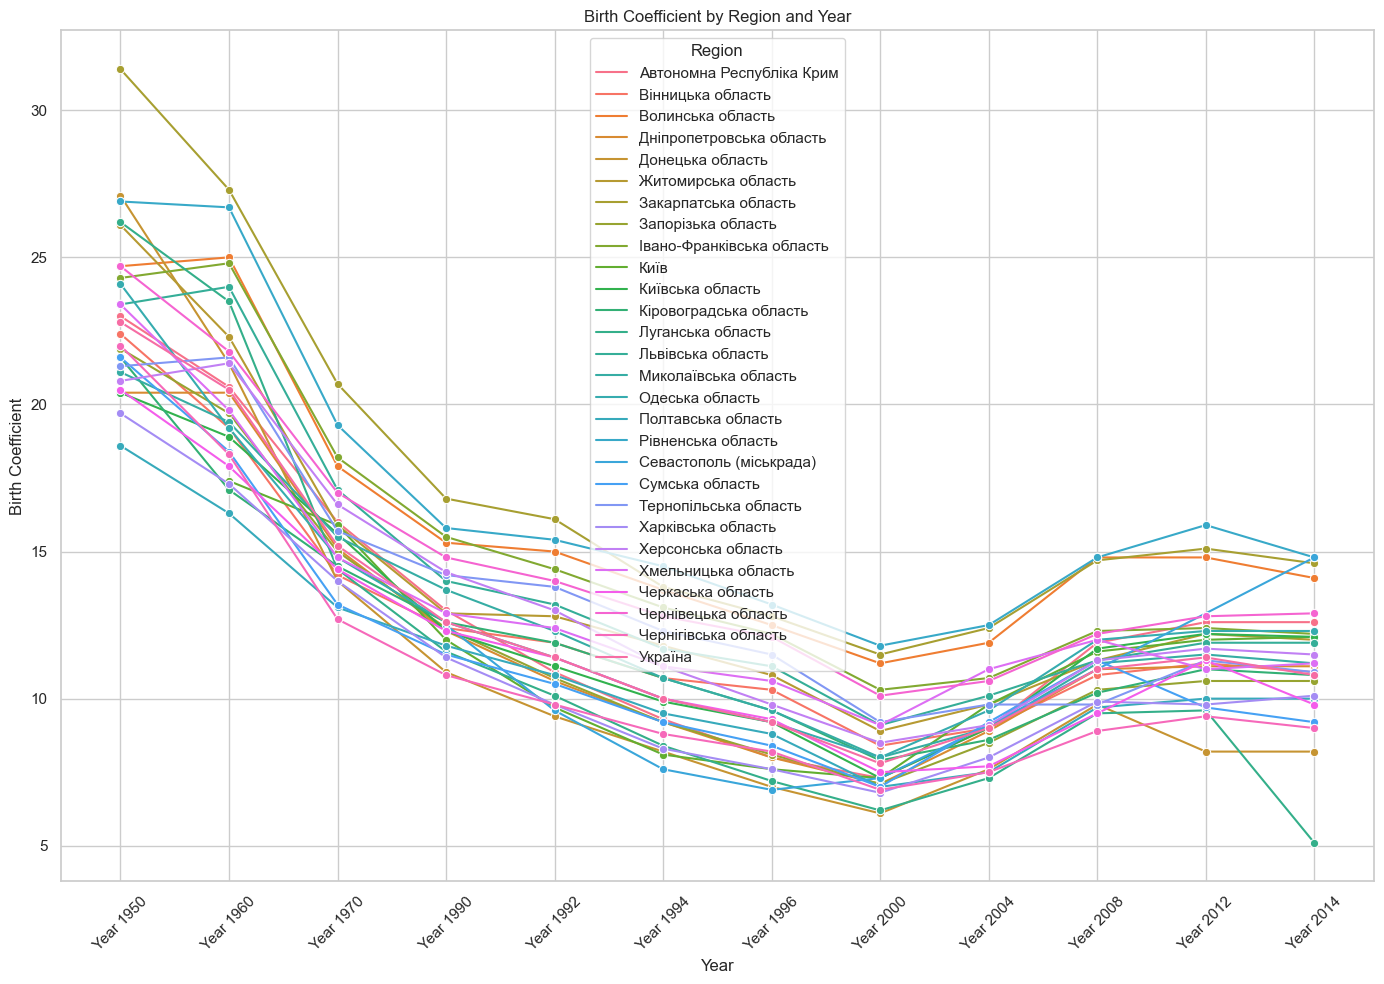

The region with the highest birth coefficient in 2014 was: Севастополь (міськрада)


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Region": ["Автономна Республіка Крим", "Вінницька область", "Волинська область", "Дніпропетровська область",
               "Донецька область", "Житомирська область", "Закарпатська область", "Запорізька область",
               "Івано-Франківська область", "Київ", "Київська область", "Кіровоградська область",
               "Луганська область", "Львівська область", "Миколаївська область", "Одеська область",
               "Полтавська область", "Рівненська область", "Севастополь (міськрада)", "Сумська область",
               "Тернопільська область", "Харківська область", "Херсонська область", "Хмельницька область",
               "Черкаська область", "Чернівецька область", "Чернігівська область", "Україна"],
    "Year 1950": [23.0, 22.4, 24.7, 20.4, 27.1, 26.1, 31.4, 21.9, 24.3, None, 20.4, 21.6, 26.2, 23.4, 21.1, 24.1, 18.6, 26.9, None, 21.6, 21.3, 19.7, 20.8, 23.4, 20.5, 24.7, 22.0, 22.8],
    "Year 1960": [20.6, 19.2, 25.0, 20.4, 21.4, 22.3, 27.3, 19.7, 24.8, 17.4, 18.9, 17.1, 23.5, 24.0, 19.4, 19.2, 16.3, 26.7, None, 18.4, 21.6, 17.3, 21.4, 19.8, 17.9, 21.8, 18.3, 20.5],
    "Year 1970": [16.0, 14.2, 17.9, 15.1, 14.0, 15.9, 20.7, 15.0, 18.2, 15.9, 15.6, 14.5, 14.4, 17.1, 15.5, 14.8, 13.1, 19.3, None, 13.2, 15.7, 14.0, 16.6, 14.8, 14.4, 17.0, 12.7, 15.2],
    "Year 1990": [13.0, 12.4, 15.3, 12.3, 10.9, 12.9, 16.8, 12.4, 15.5, 12.0, 12.3, 12.6, 11.6, 14.0, 13.7, 12.6, 11.8, 15.8, 12.5, 11.5, 14.2, 11.4, 14.3, 12.9, 12.3, 14.8, 10.8, 12.6],
    "Year 1992": [10.9, 11.9, 15.0, 10.6, 9.4, 12.8, 16.1, 10.7, 14.4, 9.7, 11.1, 11.9, 10.1, 13.2, 12.3, 11.4, 10.8, 15.4, 9.6, 10.5, 13.8, 9.8, 13.0, 12.4, 11.4, 14.0, 9.8, 11.4],
    "Year 1994": [9.3, 10.7, 13.7, 9.2, 8.2, 11.8, 13.8, 9.2, 13.1, 8.1, 9.9, 10.7, 8.4, 11.7, 10.7, 10.0, 9.5, 14.5, 7.6, 9.2, 12.3, 8.3, 11.1, 11.1, 10.0, 12.8, 8.8, 10.0],
    "Year 1996": [8.0, 10.3, 12.5, 8.0, 7.0, 10.8, 12.8, 8.1, 12.2, 7.6, 9.2, 9.6, 7.2, 11.1, 9.6, 9.2, 8.8, 13.2, 6.9, 8.4, 11.5, 7.6, 9.8, 10.6, 9.3, 12.1, 8.2, 9.2],
    "Year 2000": [7.3, 8.4, 11.2, 7.1, 6.1, 8.9, 11.5, 7.1, 10.3, 7.3, 7.3, 7.9, 6.2, 9.1, 8.0, 8.0, 7.0, 11.8, 7.3, 7.0, 9.2, 6.8, 8.5, 9.1, 7.5, 10.1, 6.9, 7.8],
    "Year 2004": [9.0, 9.0, 11.9, 8.9, 7.6, 9.8, 12.4, 8.5, 10.7, 9.8, 9.0, 8.6, 7.3, 10.1, 9.0, 9.6, 7.5, 12.5, 9.1, 9.2, 9.8, 8.0, 9.1, 11.0, 7.7, 10.6, 7.5, 9.0],
    "Year 2008": [11.9, 10.8, 14.8, 11.0, 9.8, 11.3, 14.7, 10.3, 12.3, 11.6, 11.7, 10.2, 9.5, 11.3, 11.2, 12.0, 9.7, 14.8, 11.0, 11.3, 9.8, 9.9, 11.3, 12.0, 9.5, 12.2, 8.9, 11.0],
    "Year 2012": [12.6, 11.2, 14.8, 11.1, 8.2, 12.2, 15.1, 10.6, 12.4, 12.0, 12.2, 11.0, 9.6, 11.9, 11.5, 12.3, 10.0, 15.9, None, 9.7, 11.3, 9.8, 11.7, 11.0, 11.3, 12.8, 9.4, 11.4],
    "Year 2014": [12.6, 10.9, 14.1, 11.1, 8.2, 12.0, 14.6, 10.6, 12.2, 12.1, 12.1, 10.8, 5.1, 11.9, 11.2, 12.3, 10.0, 14.8, 14.8, 9.2, 10.9, 10.1, 11.5, 11.2, 9.8, 12.9, 9.0, 10.8]
}
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set up the plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 10))
sns.lineplot(data=df.melt(id_vars="Region", var_name="Year", value_name="Birth Coefficient"),
             x="Year", y="Birth Coefficient", hue="Region", marker="o")

plt.title("Birth Coefficient by Region and Year")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
# Find the region with the highest birth coefficient in 2014
highest_birth_2014 = df[df["Year 2014"].notnull()].sort_values(by="Year 2014", ascending=False).iloc[0]["Region"]

# Print the answer
print(f"The region with the highest birth coefficient in 2014 was: {highest_birth_2014}")
